## Problem Description

In this task, we are given a grayscale image named `blobs.tif` containing multiple round objects (blobs), possibly of two different types. The goal is to segment and highlight the boundary between these two types of blobs using morphological operations. This kind of segmentation is useful for differentiating between similar-looking objects based on their structural or spatial differences.

The problem is inspired by morphological segmentation techniques discussed in image processing textbooks (e.g., Gonzalez & Woods, pages 675–676), which include advanced morphological filtering methods like opening, closing, and morphological gradient. Question 9.34 from the textbook also offers helpful insight into separating objects based on shape and connectivity.

---

## Solution Approach

To solve this problem, we follow these steps:

1. **Load and Normalize Image**  
   The grayscale image is loaded and normalized to have pixel values between 0 and 1 for easier processing.

2. **Morphological Closing**  
   A morphological closing operation with a disk-shaped structuring element (radius = 30) is applied. This helps to remove small blobs and fill tiny holes inside the larger blobs.

3. **Morphological Opening**  
   Next, an opening operation with a larger disk (radius = 60) is used. This eliminates small gaps between the larger blobs, making them more cohesive.

4. **Morphological Gradient**  
   We compute the morphological gradient by subtracting the eroded version of the image from the dilated version. This results in an image highlighting the boundaries between the blobs.

5. **Boundary Superimposition**  
   The extracted boundaries are then superimposed on the original image by setting the boundary pixels to white (value = 1), making the result easy to visualize.

6. **Visualization**  
   Finally, we display all intermediate and final images using Matplotlib to show each processing step and the detected boundaries.

This process effectively separates and outlines the distinct types of blobs based on their size and spatial arrangement.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import disk
from scipy.ndimage import binary_dilation, binary_erosion

In [2]:
# Load the image
f = cv2.imread("/mnt/e/Term 4/HW/HW7/Images/blobs.tif", cv2.IMREAD_GRAYSCALE) / 255

In [5]:
# Closing to remove small blobs
se_close = disk(30)
fsm = cv2.morphologyEx(f, cv2.MORPH_CLOSE, se_close.astype(np.uint8))

In [8]:
# Opening to remove lighr gaps between large blobs
se_open = disk(60)
flrg = cv2.morphologyEx(fsm, cv2.MORPH_OPEN, se_open.astype(np.uint8))

In [9]:
# Gradient(Dilate - Erode)
se_gradient = np.ones((3, 3), dtype=np.uint8)
dilated = cv2.dilate(flrg, se_gradient)
eroded = cv2.erode(flrg, se_gradient)

grad = dilated - eroded

In [10]:
# Superimpose boundary on original image
final = f.copy()
final[grad > 0] = 1.0 

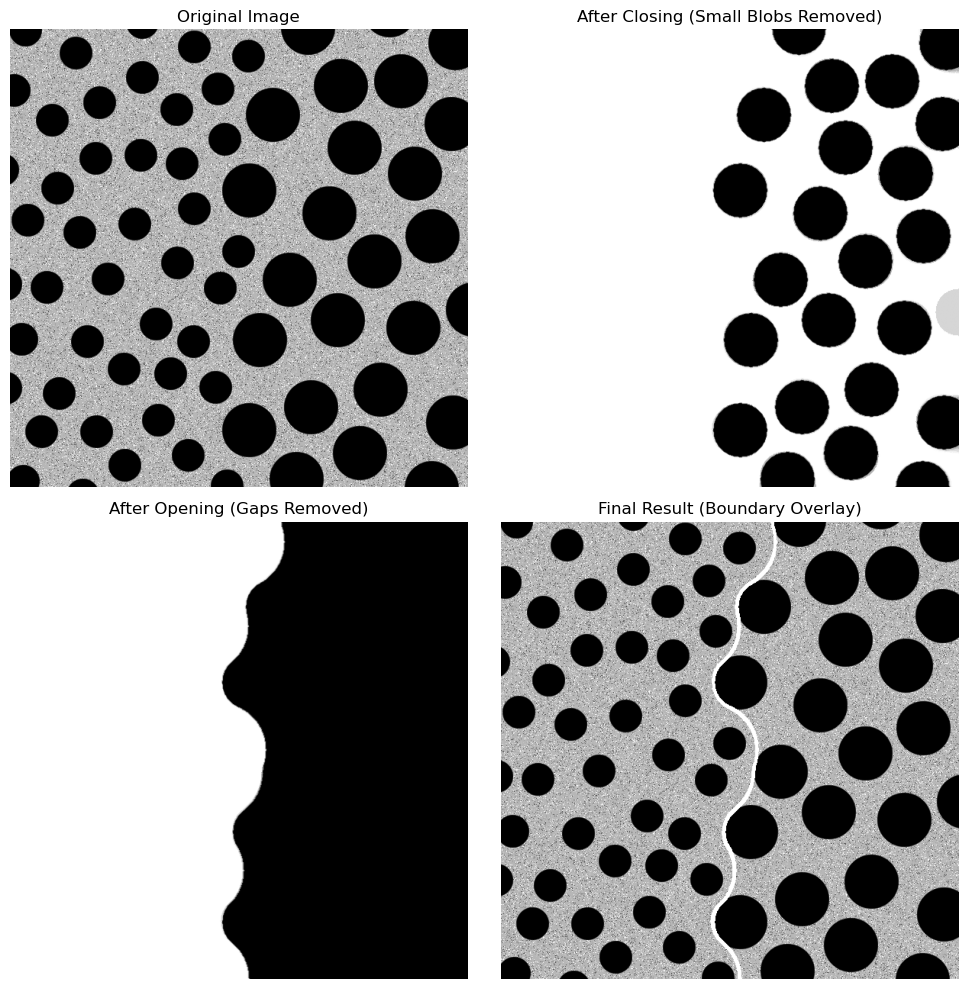

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(f, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(fsm, cmap='gray')
axs[0, 1].set_title('After Closing (Small Blobs Removed)')
axs[0, 1].axis('off')

axs[1, 0].imshow(flrg, cmap='gray')
axs[1, 0].set_title('After Opening (Gaps Removed)')
axs[1, 0].axis('off')

axs[1, 1].imshow(final, cmap='gray')
axs[1, 1].set_title('Final Result (Boundary Overlay)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
